# Haberman's Survival: Exploratory Data Analysis


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
col_names = ['age','operation_year','axil_nodes','survival_status']
file = 'haberman.csv'
data = pd.read_csv(file, names = col_names)

In [96]:
data.head()

,age,operation_year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


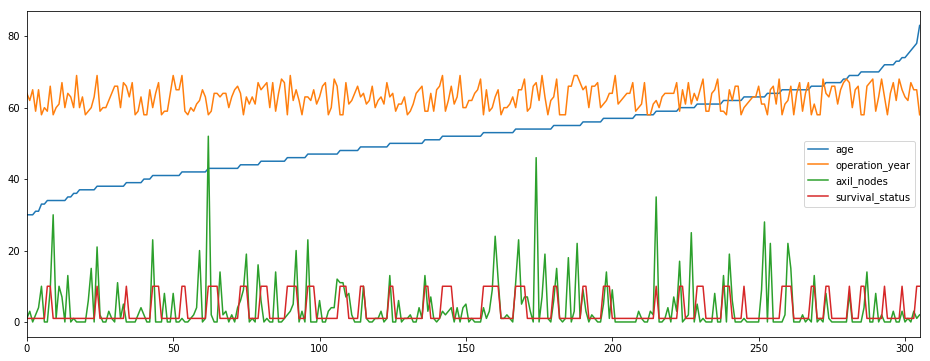

In [97]:
data['survival_status'] = data['survival_status'].map({1:1,2:10})
data.plot(figsize = (16,6))


## Observation:

  * From the above plot we can say that axil_nodes is a very important featutre for classifying the survival_status.
  * In the above graph we can see that, not_survived bars are overlapping the high axil_nodes bars.

# Descriptive Statistics

In [98]:
# Statistics
survived = data[data['survival_status'] ==1]
survived.describe()

,age,operation_year,axil_nodes,survival_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [99]:
not_survived = data[data['survival_status'] == 10]
not_survived.describe()

,age,operation_year,axil_nodes,survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,10.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,10.0
25%,46.000000,59.000000,1.000000,10.0
50%,53.000000,63.000000,4.000000,10.0
75%,61.000000,65.000000,11.000000,10.0
max,83.000000,69.000000,52.000000,10.0



## Observation:
  * The people who survived tend to have less average of axil_nodes and less spread out the distribution than not_survived.
  * The data is not balanced with labels:
     * yes = 225
     * no = 81

In [100]:
list(data['survival_status'].unique())

[1, 10]

In [101]:
data['survival_status'] = data['survival_status'].map({1:'Yes',10:'No'})
data['survival_status'] = data['survival_status'].astype('category')
data.head()

,age,operation_year,axil_nodes,survival_status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


# Univariate data analysis


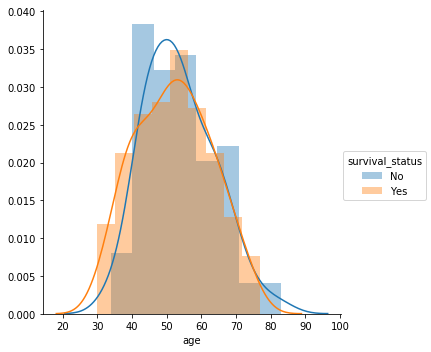

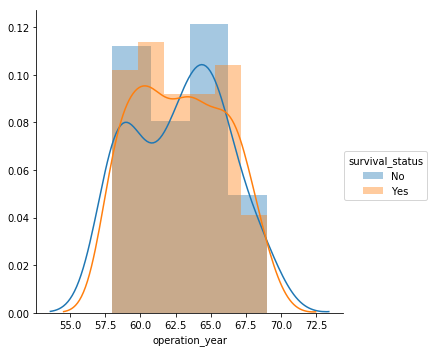

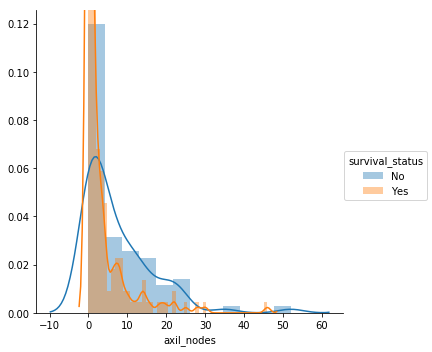

In [102]:
for index, column in enumerate(list(data.columns)[:-1]):
    fg = sns.FacetGrid(data, hue='survival_status', size=5)
    fg.map(sns.distplot, column).add_legend()
    plt.show()

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* operation_year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* axil_nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        

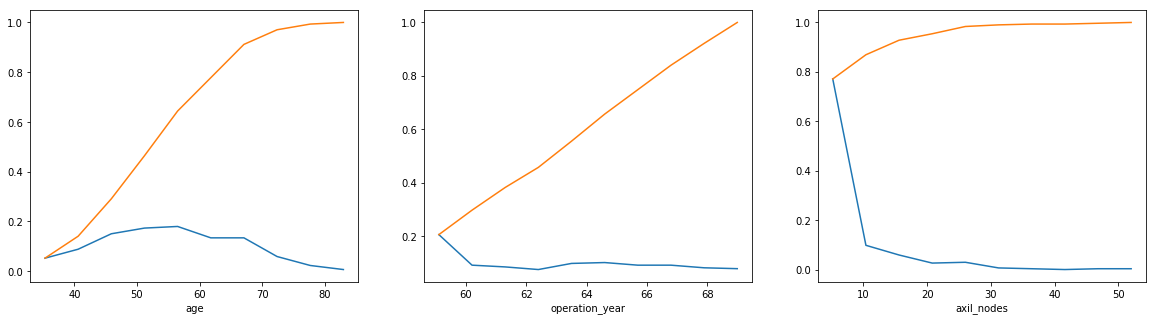

In [103]:
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(data.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(data[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

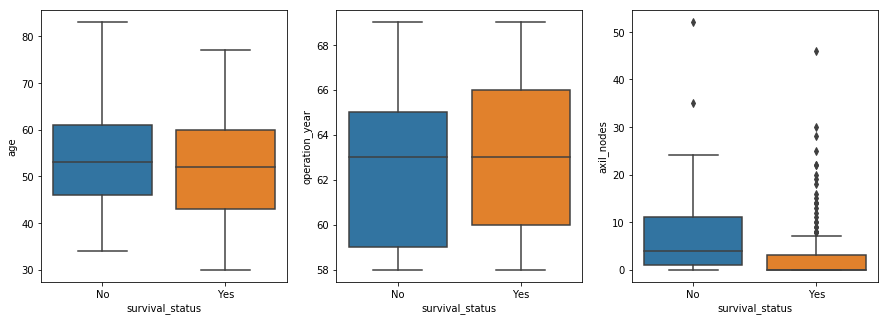

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(data.columns)[:-1]):
    sns.boxplot( x='survival_status', y=feature, data=data, ax=axes[idx])
plt.show()  

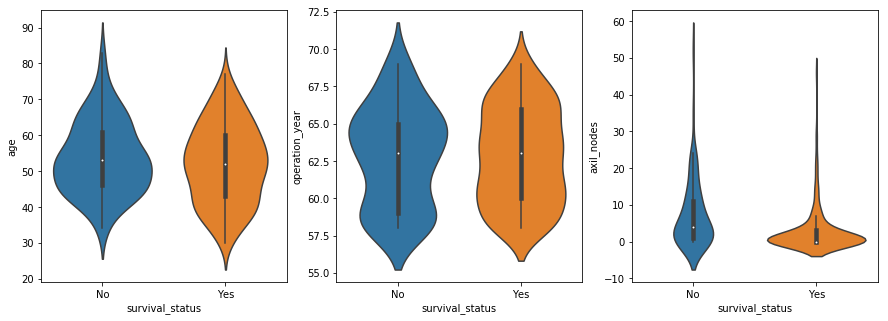

In [105]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(data.columns)[:-1]):
    sns.violinplot( x='survival_status', y=feature, data=data, ax=axes[idx])
plt.show()

## Observations:
  * The both distributions of axil_nodes are way different from each other.
  * Almost 80% of the patients have less than or equal to 5 positive axil_node.
  * The not_survived people mostly have high number of axil_nodes.
  * The survived people mostly have zero axil_nodes.
  * The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest.

# Multivariate Analysis


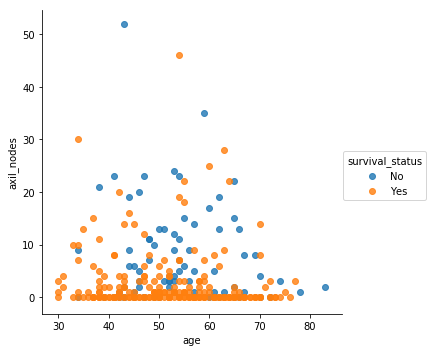

In [106]:
sns.lmplot(fit_reg = False, data = data, y = 'axil_nodes', x = 'age', hue="survival_status")

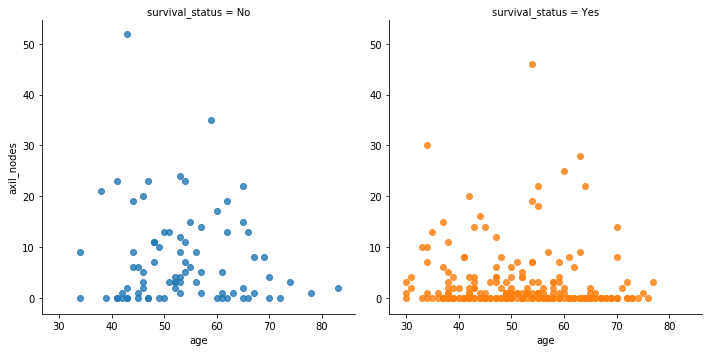

In [107]:
sns.lmplot(fit_reg = False, data = data, y = 'axil_nodes', x = 'age', hue="survival_status", col = "survival_status")

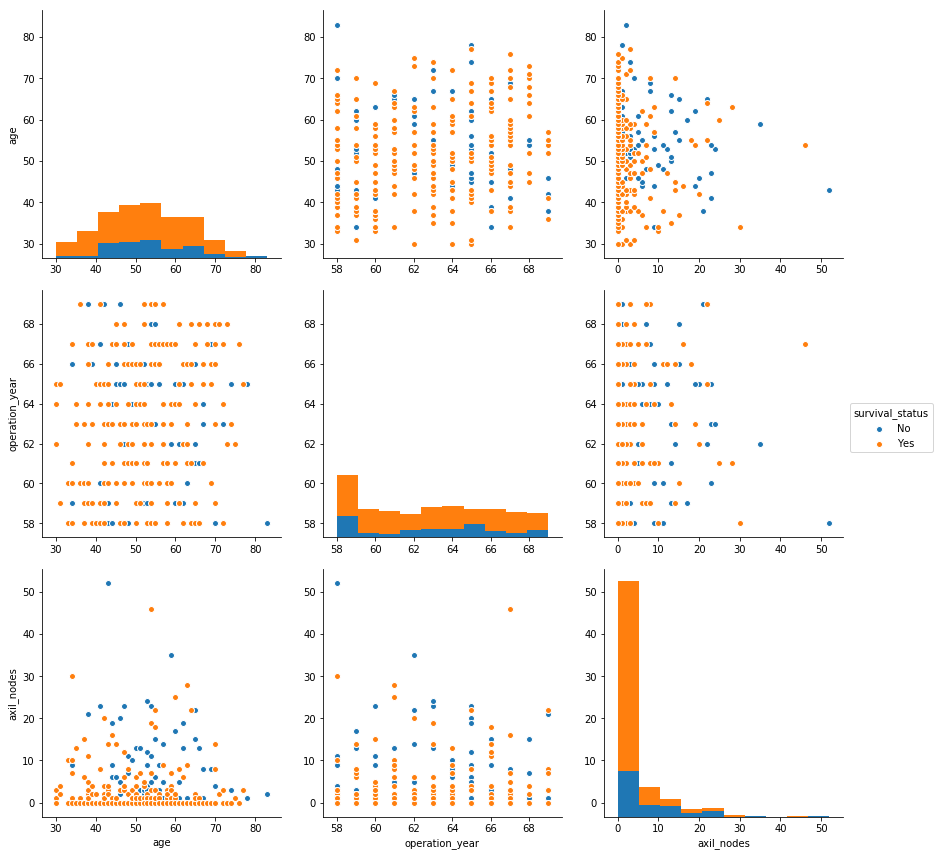

In [108]:
sns.pairplot(data, hue='survival_status', size=4)
plt.show()

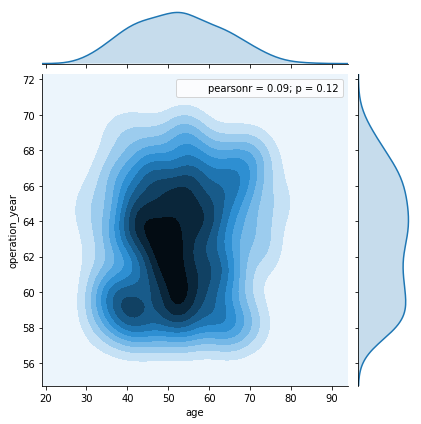

In [110]:
sns.jointplot(x= 'age',kind = 'kde', y='operation_year', data = data)
plt.show()


# Observations:
   * axil_nodes is the useful features to indentify the survival status.
   * There are more number of people undergone operation during the year 1959-1964 period and between ages 42-60.